# Keras Regression Code

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Indigo Training - Feb 2025/Indigo Training - 2025/Deep Learning/Exercises/In class Exercise - Predicting Delay/Flights_Delay_Reg.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219244 entries, 0 to 5219243
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   AIRLINE              int64  
 2   ORIGIN_AIRPORT       int64  
 3   DESTINATION_AIRPORT  int64  
 4   DISTANCE             int64  
 5   Day                  int64  
 6   DEPARTURE_DELAY      float64
 7   ARRIVAL_DELAY        float64
 8   SCHEDULED_TIME       float64
 9   ELAPSED_TIME         float64
 10  AIR_TIME             float64
 11  TAXI_IN              float64
 12  TAXI_OUT             float64
 13  DIVERTED             int64  
dtypes: float64(7), int64(7)
memory usage: 557.5 MB


In [6]:
df.drop(columns = 'Unnamed: 0', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219244 entries, 0 to 5219243
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   AIRLINE              int64  
 1   ORIGIN_AIRPORT       int64  
 2   DESTINATION_AIRPORT  int64  
 3   DISTANCE             int64  
 4   Day                  int64  
 5   DEPARTURE_DELAY      float64
 6   ARRIVAL_DELAY        float64
 7   SCHEDULED_TIME       float64
 8   ELAPSED_TIME         float64
 9   AIR_TIME             float64
 10  TAXI_IN              float64
 11  TAXI_OUT             float64
 12  DIVERTED             int64  
dtypes: float64(7), int64(6)
memory usage: 517.7 MB


## Scaling and Train Test Split

In [9]:
X = df.drop('ARRIVAL_DELAY',axis=1)
y = df['ARRIVAL_DELAY']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train= scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(3653470, 12)

In [17]:
X_test.shape

(1565774, 12)

## Creating a Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [21]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=10)

Epoch 1/10
28543/28543 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - loss: 0.3955 - val_loss: 0.0104
Epoch 2/10
28543/28543 ━━━━━━━━━━━━━━━━━━━━ 94s 3ms/step - loss: 0.3588 - val_loss: 0.0252
Epoch 3/10
28543/28543 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - loss: 0.1774 - val_loss: 0.0048
Epoch 4/10
28543/28543 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/step - loss: 0.1412 - val_loss: 0.0040
Epoch 5/10
28543/28543 ━━━━━━━━━━━━━━━━━━━━ 145s 3ms/step - loss: 0.1336 - val_loss: 0.0032
Epoch 6/10
28543/28543 ━━━━━━━━━━━━━━━━━━━━ 87s 3ms/step - loss: 0.1262 - val_loss: 0.0032
Epoch 7/10
28543/28543 ━━━━━━━━━━━━━━━━━━━━ 94s 3ms/step - loss: 0.1097 - val_loss: 0.0022
Epoch 8/10
28543/28543 ━━━━━━━━━━━━━━━━━━━━ 87s 3ms/step - loss: 0.1077 - val_loss: 0.0022
Epoch 9/10
28543/28543 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - loss: 0.1136 - val_loss: 0.0037
Epoch 10/10
28543/28543 ━━━━━━━━━━━━━━━━━━━━ 138s 3ms/step - loss: 0.0955 - val_loss: 0.0057


In [22]:
losses = pd.DataFrame(model.history.history)

<Axes: >

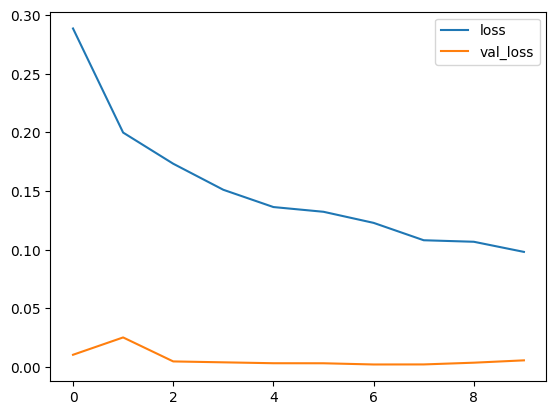

In [23]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [25]:
X_test

array([[0.15384615, 0.31132075, 0.71383648, ..., 0.02024291, 0.0625    ,
        0.        ],
       [0.38461538, 0.95283019, 0.83018868, ..., 0.0242915 , 0.07589286,
        0.        ],
       [0.07692308, 0.71383648, 0.83647799, ..., 0.00404858, 0.04464286,
        0.        ],
       ...,
       [0.        , 0.90251572, 0.86477987, ..., 0.01214575, 0.04017857,
        0.        ],
       [0.07692308, 0.29245283, 0.27044025, ..., 0.05263158, 0.12053571,
        0.        ],
       [0.69230769, 0.25471698, 0.06289308, ..., 0.02834008, 0.06696429,
        0.        ]])

In [26]:
predictions = model.predict(X_test)

48931/48931 ━━━━━━━━━━━━━━━━━━━━ 66s 1ms/step


In [27]:
mean_absolute_error(y_test,predictions)

0.04632537144483203

In [28]:
np.sqrt(mean_squared_error(y_test,predictions))

0.07538531564471818

In [29]:
explained_variance_score(y_test,predictions)

0.9999965715941431

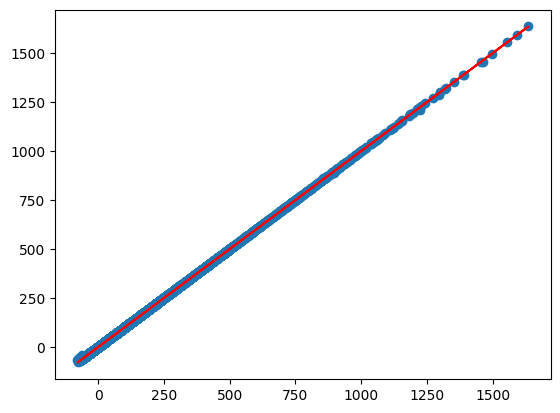

In [30]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
# Saving and Loading a model

In [33]:
from tensorflow.keras.models import load_model

In [37]:
model.save('my_model.keras')  # creates a HDF5 file 'my_model.h5'

In [38]:
later_model = load_model('/content/my_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
